# Navigation Project

---


### 1. Import Necessary Packages

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import os
import torch
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Load and explore the environment

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

In [2]:
# load the environment
env = UnityEnvironment(file_name="/home/taylor/Classes/deep_rl/projects/deep-reinforcement-learning/p1_navigation/Banana_Linux/Banana.x86_64")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

#get the current state
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Load the agent

In [3]:
from dqn_agent import Agent
#initialize the agent - # of states, actions, and a seed of 0
agent = Agent(state_size=37, action_size=4, seed=0)

# print the agent's local network
print("Local Network")
agent.qnetwork_local

print("Target Network")
# Print the agents target network
agent.qnetwork_target

Local Network
Target Network


QNetwork(
  (fc1): Linear(in_features=37, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=4, bias=True)
)

### 4. Train the agent

Episode 100	Epsilon 0.36603234127322926	Average Score: 2.01
Episode 200	Epsilon 0.13397967485796175	Average Score: 7.60
Episode 300	Epsilon 0.04904089407128576	Average Score: 10.91

Environment solved in 256 episodes!	Average Score: 13.06


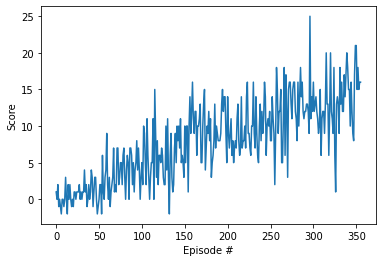

In [4]:
def dqn(n_episodes = 2000, max_t = 1000, eps_start = 1.0, eps_end = 0.01, eps_decay = 0.99):
    """ Deep Q learning for Navigations Project
    Params:
        n_episodes (int): max n umber of training episodes
        max_t (int): max n umber of time steps per episode
        eps_start (oat): startign vbalue for epsilon, for the epsilon greedy action section
        eps_end (float): min value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon    
    """
    scores = [] # list containing scores for each episode
    scores_window = deque(maxlen=100) # last 100 scores
    eps = eps_start # initialize epsilon

    for i_episode in range(1, n_episodes +1): 
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)                 # choose an action                 
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            
            # step into next state and return the resulting state
            agent.step(state, action, reward,  next_state, done) 
            state = next_state          
            score+= reward                                 # increment the score
            if done:                                       # if you have reached the goal, then exit the loop
                break
        scores_window.append(score) #save most recent score
        scores.append(score) # save most recent score
        eps = max(eps_end, eps_decay*eps) #decrease epsilon

        if i_episode % 100 == 0:
            print('\rEpisode {}\tEpsilon {}\tAverage Score: {:.2f}'.format(i_episode, eps, np.mean(scores_window)))
        
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = dqn()
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()





### 5. Close the environment


In [5]:
env.close()
